In [1]:
# Loading Librarieimport pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import statsmodels.api as sm
import pylab as py
from sklearn.model_selection import cross_val_score, cross_val_predict

In [2]:
# importing the dataset
shipset = pd.read_csv("/Users/gurpreetchandok/Desktop/STAT 610/Case Study/Shipment Data.csv")

In [3]:
shipset.rename(columns={"Age at Sale (Years)": "Age_at_Sale"},inplace = True) ; shipset

,SaleDate,Vessel,Price,YearBuilt,Age_at_Sale,DWT,Capesize,Month
0,2023-01-07,Lowlands Beilun,73,1999,8,170.2,4647,1
1,2023-01-07,CHS Moon,45,1991,16,150.2,4647,1
2,2023-01-07,Spring Brave,62,1995,12,151.1,4647,1
3,2023-01-07,Martha Verity,60,1995,12,158.0,4647,1
4,2023-01-07,TMT TBN,61,1993,14,174.7,4647,1
5,2023-02-07,Pantelis SP,83,1999,8,169.9,4878,2
6,2023-02-07,Amazon,45,1990,17,149.5,4878,2
7,2023-03-07,Cape Kassos,100,2004,3,170.0,5245,3
8,2023-03-07,Johnny K,65,1994,13,165.3,5245,3
9,2023-03-07,Zorbas,70,1996,11,165.1,5245,3


In [4]:
# Mean, Standard Deviation and other metrics
shipset.describe()

,Price,YearBuilt,Age_at_Sale,DWT,Capesize,Month
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,72.979167,1992.916667,14.270833,158.935417,7643.708333,5.312500
std,33.893757,6.330720,6.330405,17.650984,2499.309368,3.543987
min,22.000000,1981.000000,3.000000,98.400000,4647.000000,1.000000
25%,46.500000,1987.750000,10.750000,149.275000,5245.000000,3.000000
50%,66.000000,1994.000000,13.000000,161.450000,6799.000000,4.000000
75%,88.500000,1996.250000,20.000000,170.125000,9663.000000,8.250000
max,158.000000,2004.000000,26.000000,207.100000,12479.000000,12.000000


In [ ]:
##Distribution of the variables

Text(0.5, 1.0, 'Price Distribution')

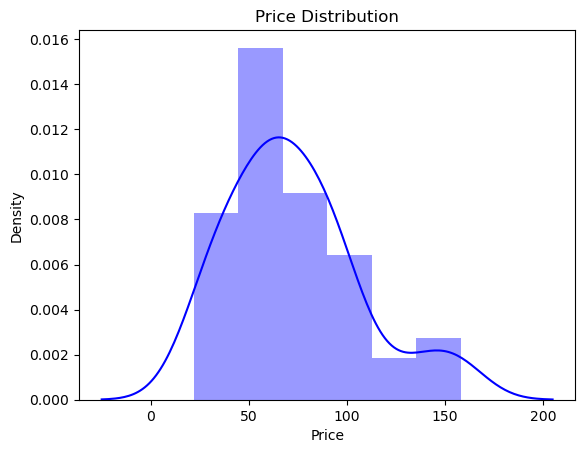

In [9]:
sns.distplot(shipset['Price'], color = 'blue')
plt.title("Price Distribution")

Text(0.5, 1.0, 'DWT Distribution')

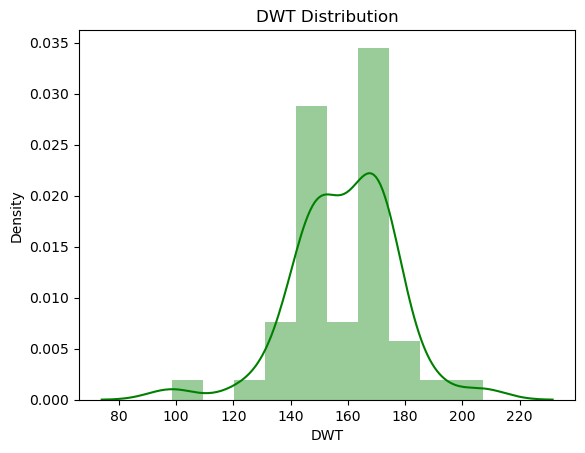

In [10]:
sns.distplot(shipset['DWT'], color = 'green')
plt.title("DWT Distribution")

Text(0.5, 1.0, 'Age at Sale Distribution')

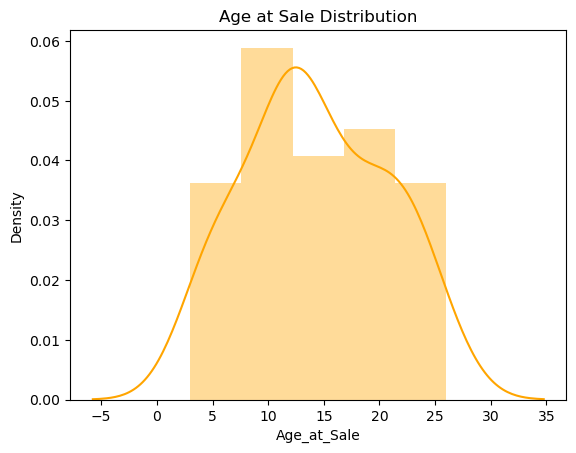

In [11]:
sns.distplot(shipset['Age_at_Sale'], color = 'orange')
plt.title("Age at Sale Distribution")

Text(0.5, 1.0, 'Capesize Distribution')

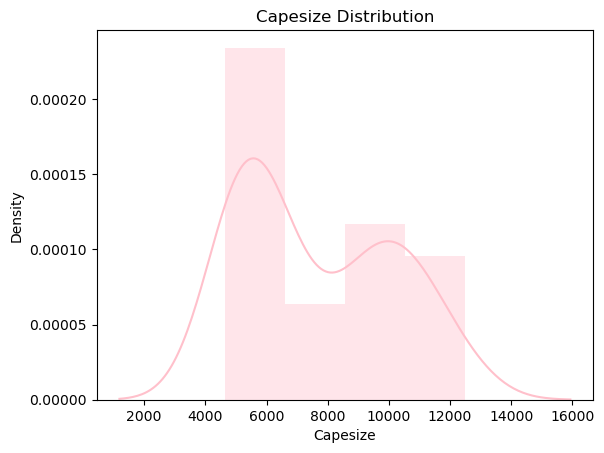

In [12]:
sns.distplot(shipset['Capesize'], color = 'pink')
plt.title("Capesize Distribution")

In [ ]:
# Relationship between the variables

Text(0.5, 1.0, 'Age_at_Sale vs Price')

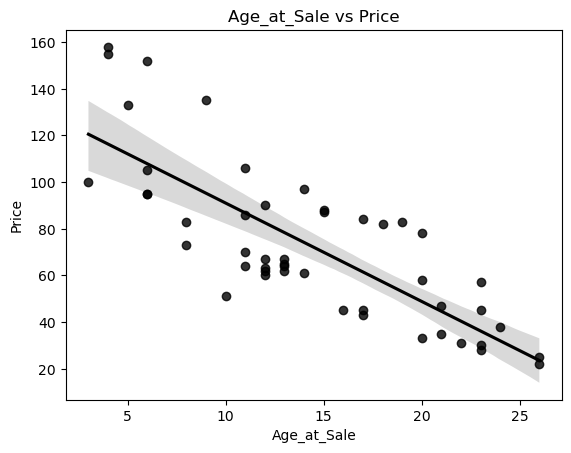

In [13]:
# Age at sale and Price
sns.regplot(x = shipset['Age_at_Sale'], y = shipset['Price'],marker = 'o', color = 'black')
plt.title('Age_at_Sale vs Price')
# Negative correlation between price and age at sale

Text(0.5, 1.0, 'Capesize vs Price')

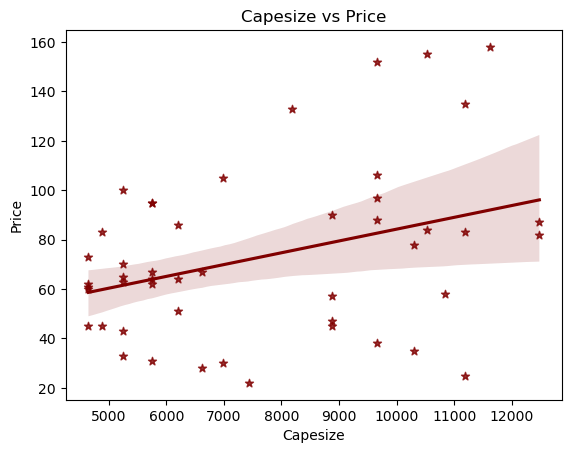

In [14]:
# Capesize and Price
sns.regplot(x = shipset['Capesize'], y = shipset['Price'],marker = '*', color = 'maroon')
plt.title('Capesize vs Price')

Text(0.5, 1.0, 'DWT vs Price')

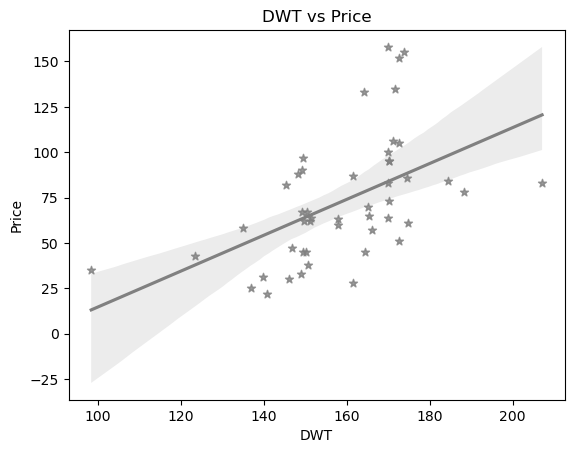

In [15]:
# DWT and Price
sns.regplot(x = shipset['DWT'], y = shipset['Price'],marker = '*', color = 'grey')
plt.title('DWT vs Price')

Text(0.5, 1.0, 'Yearbuilt vs Price')

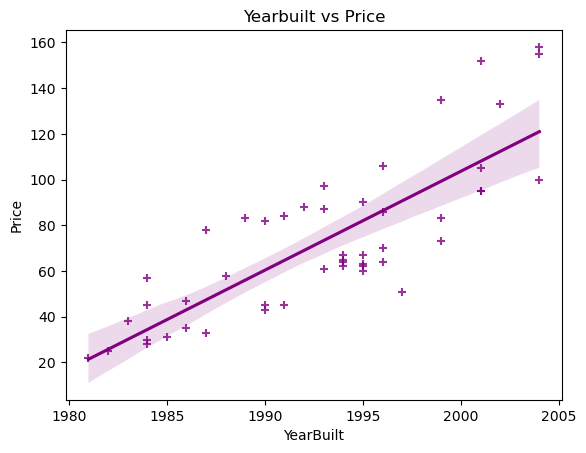

In [16]:
# Year Built and Price
sns.regplot(x = shipset['YearBuilt'], y = shipset['Price'],marker = '+', color = 'purple')
plt.title('Yearbuilt vs Price')

In [ ]:
# Correlation Matrix and VIF

In [18]:
# Select specific columns for correlation
selected_columns = ['Price','YearBuilt','Age_at_Sale', 'DWT','Capesize','Month']

# Create a subset DataFrame with the selected columns
shipset_subset = shipset[selected_columns]

#Correlation
shipset_subset.corr()

,Price,YearBuilt,Age_at_Sale,DWT,Capesize,Month
Price,1.000000,0.808430,-0.787627,0.514754,0.352472,0.038315
YearBuilt,0.808430,1.000000,-0.998059,0.441826,-0.172633,-0.282364
Age_at_Sale,-0.787627,-0.998059,1.000000,-0.431264,0.217360,0.262640
DWT,0.514754,0.441826,-0.431264,1.000000,0.042766,-0.160653
Capesize,0.352472,-0.172633,0.217360,0.042766,1.000000,0.427984
Month,0.038315,-0.282364,0.262640,-0.160653,0.427984,1.000000


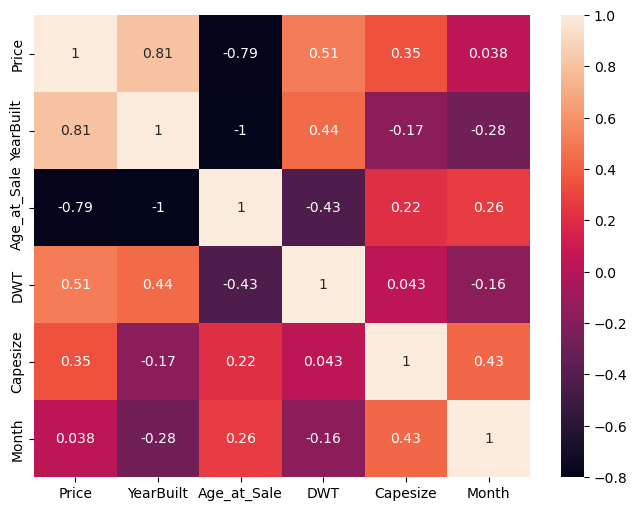

In [20]:
fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(shipset_subset.corr(),vmin=-0.8, annot=True,ax=ax);

In [ ]:
# VIF between Price and Other variables

In [21]:
Y, X = dmatrices('Price ~ DWT+Age_at_Sale+Capesize', data=shipset, return_type='dataframe')

In [22]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns ; vif

,VIF,variable
0,131.944976,Intercept
1,1.258727,DWT
2,1.318729,Age_at_Sale
3,1.075427,Capesize


In [ ]:
# Linear Regression with Standardization

In [23]:
shipset_regression = shipset[["Age_at_Sale","DWT","Capesize","Price"]].copy() ; shipset_regression_results = shipset[["Age_at_Sale","DWT","Capesize","Price"]].copy()

In [24]:
X = shipset_regression.values[:,:-1] ; Y = shipset_regression.values[:,-1]

In [25]:
LinearReg1 = LinearRegression().fit(X,Y)

In [26]:
m = LinearReg1.coef_.flatten() ; b = LinearReg1.intercept_.flatten()

In [27]:
print("m = {0}".format(m)) ; print("b = {0}".format(b))

m = [-4.54491661  0.24182468  0.00720909]
b = [44.30020712]


In [28]:
LinearReg1_Y_predicted = LinearReg1.predict(X)

In [29]:
shipset_regression_results['LinearReg1_Y_predicted'] = LinearReg1_Y_predicted

In [30]:
shipset_regression_results

,Age_at_Sale,DWT,Capesize,Price,LinearReg1_Y_predicted
0,8,170.2,4647,73,82.600088
1,16,150.2,4647,45,41.404262
2,12,151.1,4647,62,59.801570
3,12,158.0,4647,60,61.470161
4,14,174.7,4647,61,56.418800
5,8,169.9,4878,83,84.192841
6,17,149.5,4878,45,38.355368
7,3,170.0,5245,100,109.587344
8,13,165.3,5245,65,63.001601
9,11,165.1,5245,70,72.043070


In [31]:
residuals_LinearReg1 = Y - LinearReg1_Y_predicted

In [32]:
shipset_regression_results['LinearReg1 Residuals'] = residuals_LinearReg1

In [33]:
r_squared_LinearReg1 =  LinearReg1.score(X, Y) ; print(r_squared_LinearReg1)

0.9207860249524997


In [34]:
print(mean_absolute_error(Y, LinearReg1_Y_predicted))

6.866188070245531


In [35]:
print(mean_squared_error(Y, LinearReg1_Y_predicted))

89.10413550934443


In [ ]:
# Residual Plot for Linear Regression with Standardization

(-75.0, 75.0)

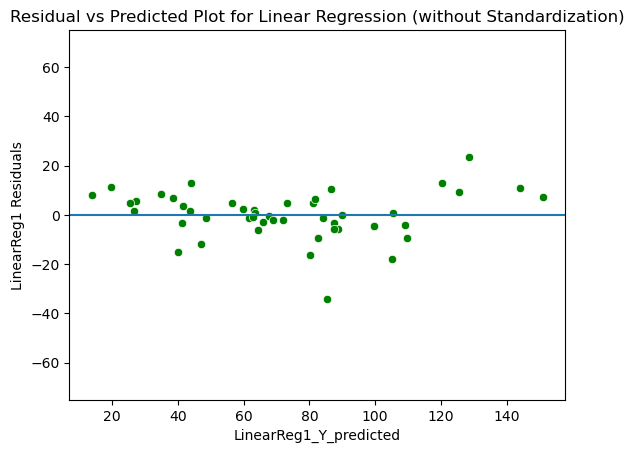

In [36]:
sns.scatterplot(data = shipset_regression_results, x = 'LinearReg1_Y_predicted' , y = 'LinearReg1 Residuals', color = 'green')
plt.title("Residual vs Predicted Plot for Linear Regression (without Standardization)")
plt.axhline(y=0)
plt.ylim(-75,75)

Text(0.5, 0, 'Residuals')

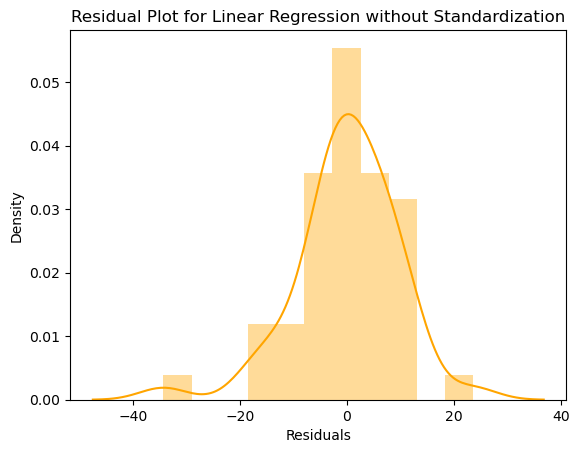

In [37]:
sns.distplot(residuals_LinearReg1, color = 'orange')
plt.title("Residual Plot for Linear Regression without Standardization")
plt.xlabel("Residuals")

In [ ]:
# Cross Validation of Linear Regression without Standardization

In [38]:
scores = cross_val_score(LinearReg1, X, Y, cv=5)
print ("Cross-validated scores:", scores.mean())

Cross-validated scores: 0.8718339765999591


In [ ]:
# Ordinary Least Squares on Non-Standardized Dataset

In [39]:
X = sm.add_constant(X)

In [40]:
ols1 = sm.OLS(Y, X).fit()

In [41]:
ols1_predictions = ols1.predict(X)

In [42]:
shipset_regression_results['OLS1_Y_predicted'] = ols1_predictions
shipset_regression_results['OLS1_Residuals'] = ols1.resid ; print(ols1.resid.mean())

2.119637798614349e-12


In [43]:
print(mean_absolute_error(Y, ols1_predictions))

6.866188070245655


In [44]:
print(mean_squared_error(Y, ols1_predictions))

89.10413550934443


In [45]:
shipset_regression_results

,Age_at_Sale,DWT,Capesize,Price,LinearReg1_Y_predicted,LinearReg1 Residuals,OLS1_Y_predicted,OLS1_Residuals
0,8,170.2,4647,73,82.600088,-9.600088,82.600088,-9.600088
1,16,150.2,4647,45,41.404262,3.595738,41.404262,3.595738
2,12,151.1,4647,62,59.801570,2.198430,59.801570,2.198430
3,12,158.0,4647,60,61.470161,-1.470161,61.470161,-1.470161
4,14,174.7,4647,61,56.418800,4.581200,56.418800,4.581200
5,8,169.9,4878,83,84.192841,-1.192841,84.192841,-1.192841
6,17,149.5,4878,45,38.355368,6.644632,38.355368,6.644632
7,3,170.0,5245,100,109.587344,-9.587344,109.587344,-9.587344
8,13,165.3,5245,65,63.001601,1.998399,63.001601,1.998399
9,11,165.1,5245,70,72.043070,-2.043070,72.043070,-2.043070


In [46]:
ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     170.5
Date:                Sun, 12 Nov 2023   Prob (F-statistic):           3.07e-24
Time:                        17:48:40   Log-Likelihood:                -175.86
No. Observations:                  48   AIC:                             359.7
Df Residuals:                      44   BIC:                             367.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.3002     16.346      2.710      0.010      11.356      77.244
x1            -4.5449      0.261    -17.421      0.000      -5.071      -4.019
x2             0.2418      0.091      2.646      0.011       0.058       0.426
x3             0.0072      0.001     12.081      0.000       0.006       0.008
==============================================================================
Omnibus:                       12.722   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.687
Skew:                          -0.828   Prob(JB):                     0.000144
Kurtosis:                       5.470   Cond. No.                     9.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Linear Regression 1 equation
#Price = 44.3 + Age_at_Sale*(-4.54) + DWT*(0.24) + Capesize*(0.0072)

In [47]:
DWT_custom = float(input('What is the ship\'s DWT \n')) ;

What is the ship's DWT 
172


In [48]:
Age_at_Sale_custom = int(input('What is the ship\'s age during sale \n')) ;

What is the ship's age during sale 
11


In [49]:
Capesize_index = float(input('What is the ship\'s capesize \n')) ; 

What is the ship's capesize 
12479


In [50]:
Price_estimated = 44.22 + DWT_custom*(0.24) + Capesize_index*(0.0072) + Age_at_Sale_custom*(-4.54) ; print("\nEstimated Price of the ship is = {0}".format(Price_estimated))


Estimated Price of the ship is = 125.40879999999999


In [ ]:
# OLS on Standardized Dataset

In [51]:
shipset_standard = shipset[["Age_at_Sale","DWT","Capesize","Price"]].copy()

In [52]:
shipset_standard=(shipset_standard-shipset_standard.min())/(shipset_standard.max()-shipset_standard.min())

In [53]:
shipset_standard

,Age_at_Sale,DWT,Capesize,Price
0,0.217391,0.660534,0.000000,0.375000
1,0.565217,0.476541,0.000000,0.169118
2,0.391304,0.484821,0.000000,0.294118
3,0.391304,0.548298,0.000000,0.279412
4,0.478261,0.701932,0.000000,0.286765
5,0.217391,0.657774,0.029494,0.448529
6,0.608696,0.470101,0.029494,0.169118
7,0.000000,0.658694,0.076353,0.573529
8,0.434783,0.615455,0.076353,0.316176
9,0.347826,0.613615,0.076353,0.352941


Text(0.5, 1.0, 'Scaled DWT Distribution')

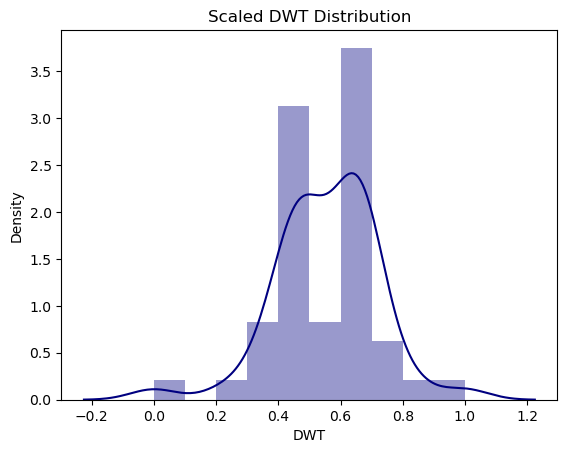

In [54]:
sns.distplot(shipset_standard['DWT'], color = 'navy')
plt.title("Scaled DWT Distribution")

In [55]:
XS = shipset_standard.values[:,:-1] ; Y = shipset_standard.values[:,-1]

In [56]:
XS = sm.add_constant(XS)

In [57]:
ols2 = sm.OLS(Y, XS).fit()

In [58]:
ols2_predictions = ols2.predict(XS)

In [59]:
ols2_residuals = ols2.resid

In [60]:
shipset_regression_results['OLS2_Residuals'] = ols2_residuals

In [61]:
shipset_regression_results['OLS2_Y_predicted'] = ols2_predictions

In [62]:
shipset_regression_results['OLS2_Y_predicted'] = shipset_regression_results['OLS2_Y_predicted']*136 + 22

In [63]:
shipset_regression_results

,Age_at_Sale,DWT,Capesize,Price,LinearReg1_Y_predicted,LinearReg1 Residuals,OLS1_Y_predicted,OLS1_Residuals,OLS2_Residuals,OLS2_Y_predicted
0,8,170.2,4647,73,82.600088,-9.600088,82.600088,-9.600088,-0.070589,82.600088
1,16,150.2,4647,45,41.404262,3.595738,41.404262,3.595738,0.026439,41.404262
2,12,151.1,4647,62,59.801570,2.198430,59.801570,2.198430,0.016165,59.801570
3,12,158.0,4647,60,61.470161,-1.470161,61.470161,-1.470161,-0.010810,61.470161
4,14,174.7,4647,61,56.418800,4.581200,56.418800,4.581200,0.033685,56.418800
5,8,169.9,4878,83,84.192841,-1.192841,84.192841,-1.192841,-0.008771,84.192841
6,17,149.5,4878,45,38.355368,6.644632,38.355368,6.644632,0.048858,38.355368
7,3,170.0,5245,100,109.587344,-9.587344,109.587344,-9.587344,-0.070495,109.587344
8,13,165.3,5245,65,63.001601,1.998399,63.001601,1.998399,0.014694,63.001601
9,11,165.1,5245,70,72.043070,-2.043070,72.043070,-2.043070,-0.015023,72.043070


In [64]:
ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     170.5
Date:                Sun, 12 Nov 2023   Prob (F-statistic):           3.07e-24
Time:                        18:20:34   Log-Likelihood:                 59.943
No. Observations:                  48   AIC:                            -111.9
Df Residuals:                      44   BIC:                            -104.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4850      0.054      9.029      0.000       0.377       0.593
x1            -0.7686      0.044    -17.421      0.000      -0.858      -0.680
x2             0.1933      0.073      2.646      0.011       0.046       0.341
x3             0.4152      0.034     12.081      0.000       0.346       0.484
==============================================================================
Omnibus:                       12.722   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.687
Skew:                          -0.828   Prob(JB):                     0.000144
Kurtosis:                       5.470   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, 'Residuals')

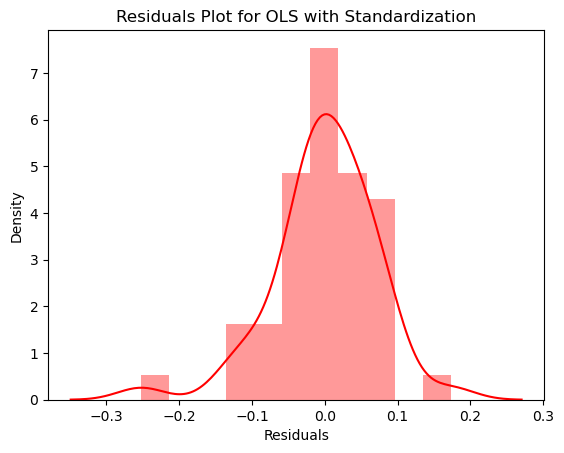

In [66]:
sns.distplot(ols2_residuals, color = 'red')
plt.title("Residuals Plot for OLS with Standardization")
plt.xlabel("Residuals")

(-20.0, 20.0)

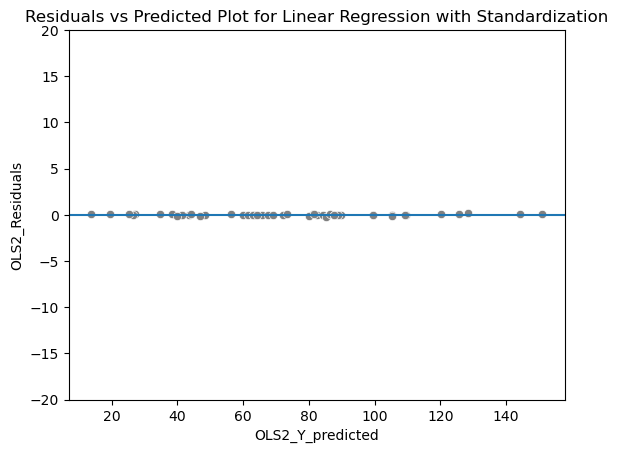

In [69]:
sns.scatterplot(data = shipset_regression_results, x = 'OLS2_Y_predicted' , y = 'OLS2_Residuals', color = 'grey')
plt.title("Residuals vs Predicted Plot for Linear Regression with Standardization")
plt.axhline(y=0)
plt.ylim(-20,20)

In [70]:
print(mean_absolute_error(Y, ols2_predictions))

0.05048667698709952


In [ ]:
# Calculating price with standardized dataset

In [71]:
Price_estimated = 0.4850 + DWT_custom*(0.1933) + Capesize_index*(0.4152) + Age_at_Sale_custom*(-0.7686) ; print("\nEstimated Price of the ship after standardizing is = {0}".format(Price_estimated))


Estimated Price of the ship after standardizing is = 5206.558800000001
